# Import necessary packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option('display.max_rows', 100)

## Concat csv files into one dataframe - df

In [2]:

df_monday = pd.read_csv ('Monday-WorkingHours.pcap_ISCX.csv')
df_tuesday = pd.read_csv ('Tuesday-WorkingHours.pcap_ISCX.csv')
df_wednesday = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')
df_thursday_morning = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df_thursday_afternoon = pd.read_csv('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df_friday_morning = pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')
df_friday_afternoon_ddos = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df_friday_afternoon_portscan = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')


In [3]:
data = [df_monday, df_tuesday, df_wednesday, df_thursday_morning, df_thursday_afternoon, df_friday_morning, df_friday_afternoon_ddos, df_friday_afternoon_portscan] 

In [4]:
df = pd.concat(data)

# For statistical reasons

In [ ]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:50]

# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

# Data cleaning

### Mark columns with Inf/NaN values with value -1

In [5]:
# Replace inf values with nan
df_clean = df.replace([np.inf, -np.inf], np.nan)

In [6]:
for column in df_clean:
    count = df_clean[column].isna().sum()
    print("In column {} the percentage of NaN is {} %".format(column, (count/df_clean.shape[0])*100 ))

df_clean = df_clean.replace(np.nan, -1)
#df_clean = df.dropna(axis=1)
# columns_with_na_dropped.head()

In column  Destination Port the percentage of NaN is 0.0 %
In column  Flow Duration the percentage of NaN is 0.0 %
In column  Total Fwd Packets the percentage of NaN is 0.0 %
In column  Total Backward Packets the percentage of NaN is 0.0 %
In column Total Length of Fwd Packets the percentage of NaN is 0.0 %
In column  Total Length of Bwd Packets the percentage of NaN is 0.0 %
In column  Fwd Packet Length Max the percentage of NaN is 0.0 %
In column  Fwd Packet Length Min the percentage of NaN is 0.0 %
In column  Fwd Packet Length Mean the percentage of NaN is 0.0 %
In column  Fwd Packet Length Std the percentage of NaN is 0.0 %
In column Bwd Packet Length Max the percentage of NaN is 0.0 %
In column  Bwd Packet Length Min the percentage of NaN is 0.0 %
In column  Bwd Packet Length Mean the percentage of NaN is 0.0 %
In column  Bwd Packet Length Std the percentage of NaN is 0.0 %
In column Flow Bytes/s the percentage of NaN is 0.1012808298033414 %
In column  Flow Packets/s the percentag

### Delete columns that contain ZERO (0) values in 99% and above of rows 

In [7]:
print("Total columns before deleting {}".format(df_clean.shape[1]))

for column in df_clean:
    count = (df_clean[column] == 0).sum()
    percent_of_zeros = (count/df_clean.shape[0])*100
    #if(percent_of_zeros >= 70):
    #    print('Perc of zeros in Column  {} is {} %: '.format(column, percent_of_zeros))
    if(percent_of_zeros >= 99.0):
        print("Column deleted: {}".format(column))
        df_clean.drop(column, inplace=True, axis=1)
    
print("Total rows: {}".format(df_clean.shape[0]))
print("Total columns after deleting: {}" .format(df_clean.shape[1]))

Total columns before deleting 79
Column deleted:  Bwd PSH Flags
Column deleted:  Fwd URG Flags
Column deleted:  Bwd URG Flags
Column deleted:  RST Flag Count
Column deleted:  CWE Flag Count
Column deleted:  ECE Flag Count
Column deleted: Fwd Avg Bytes/Bulk
Column deleted:  Fwd Avg Packets/Bulk
Column deleted:  Fwd Avg Bulk Rate
Column deleted:  Bwd Avg Bytes/Bulk
Column deleted:  Bwd Avg Packets/Bulk
Column deleted: Bwd Avg Bulk Rate
Total rows: 2830743
Total columns after deleting: 67


### Delete columns that contain INF+NAN values in 30% and above of rows

In [8]:
print("Total columns before deleting {}".format(df_clean.shape[1]))

for column in df_clean:
    count = (df_clean[column] == -1).sum()
    percent_of_inf_nan = (count/df_clean.shape[0])*100
    #if(percent_of_zeros >= 70):
    print('Perc of inf+nan in Column  {} is {} %: '.format(column, percent_of_inf_nan))
    if(percent_of_inf_nan >= 30.0):
        df_clean.drop(column, inplace=True, axis=1)
    
print("Total rows: {}".format(df_clean.shape[0]))
print("Total columns after deleting: {}" .format(df_clean.shape[1]))

Total columns before deleting 67
Perc of inf+nan in Column   Destination Port is 0.0 %: 
Perc of inf+nan in Column   Flow Duration is 0.003850579158899271 %: 
Perc of inf+nan in Column   Total Fwd Packets is 0.0 %: 
Perc of inf+nan in Column   Total Backward Packets is 0.0 %: 
Perc of inf+nan in Column  Total Length of Fwd Packets is 0.0 %: 
Perc of inf+nan in Column   Total Length of Bwd Packets is 0.0 %: 
Perc of inf+nan in Column   Fwd Packet Length Max is 0.0 %: 
Perc of inf+nan in Column   Fwd Packet Length Min is 0.0 %: 
Perc of inf+nan in Column   Fwd Packet Length Mean is 0.0 %: 
Perc of inf+nan in Column   Fwd Packet Length Std is 0.0 %: 
Perc of inf+nan in Column  Bwd Packet Length Max is 0.0 %: 
Perc of inf+nan in Column   Bwd Packet Length Min is 0.0 %: 
Perc of inf+nan in Column   Bwd Packet Length Mean is 0.0 %: 
Perc of inf+nan in Column   Bwd Packet Length Std is 0.0 %: 
Perc of inf+nan in Column  Flow Bytes/s is 0.1012808298033414 %: 
Perc of inf+nan in Column   Flow P

### Delete rows that contain at least one inf or nan value in any column/feature

In [9]:
print("Number of rows before deleting rows {}".format(df_clean.shape[0]))
for column in df_clean:
    df_clean = df_clean[df_clean[column] != -1]

print("Number of rows after deleting rows {}".format(df_clean.shape[0]))
print("Percentage of deleted rows: {} %".format(((df.shape[0]-df_clean.shape[0])/df.shape[0])*100))

Number of rows before deleting rows 2830743
Number of rows after deleting rows 2825122
Percentage of deleted rows: 0.1985697747905762 %


# Start of data pre-processing

## Feature selection

### Prepare variables for information gain computation

In [ ]:
df_clean_1 = df_clean
df_clean_2 = df_clean

In [ ]:
y = df_clean_1.loc[:, df_clean_1.columns == " Label"]
# X = df_clean_2.loc[:, df_clean_2.columns != " Label"]

X = df_clean_2[['Idle Mean', ' Average Packet Size']]


In [ ]:
features_col = list(df_clean.columns)

In [ ]:
y = y.astype('int')

### Information Gain

In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=['Idle Mean', ' Average Packet Size'])

In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=[' Total Backward Packets', ' Total Length of Bwd Packets'])

In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=[' Fwd Packet Length Max', ' Fwd Packet Length Min'])

In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=[' Fwd Packet Length Mean', ' Fwd Packet Length Std'])

In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=[' Bwd Packet Length Mean', ' Bwd Packet Length Std'])

In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=['Flow Bytes/s', ' Flow Packets/s'])

In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=[' Flow IAT Mean', ' Flow IAT Std'])

In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=[' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std'])

In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=[' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min'])


In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=['Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance'])

In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=['FIN Flag Count', ' SYN Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1'])


In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=['Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active Min'])


In [ ]:
# Get the mutual information coefficients and convert them to a data frame
coeff_df =pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1),
                         columns=['Coefficient'], index=['Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min'])


### Information gain result

In [ ]:
coeff_df

### Selected features regarding Information Gain scores

In [10]:
# features selected after information gain score evaluated

features_selected_col = list([" Destination Port",  " Average Packet Size", " Packet Length Mean", " Packet Length Std",
" Packet Length Variance", " Subflow Bwd Bytes", " Total Length of Bwd Packets", " Bwd Packet Length Mean", " Avg Bwd Segment Size", " Subflow Fwd Bytes", "Total Length of Fwd Packets", "Bwd Packet Length Max", " Max Packet Length"," Fwd Packet Length Max"
," Flow IAT Max", " Label"])

In [11]:
df_clean[" Label"].replace(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 
                       'DoS GoldenEye', 'Heartbleed','Web Attack � Brute Force', 'Web Attack � XSS', 'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'DDoS', 'PortScan'],
                        [0, 1, 2, 3, 4 , 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14], inplace=True)



## Split to train/test

In [12]:
X = df_clean[list(df_clean.columns)]
y = df_clean.loc[:, df_clean.columns == " Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
print('Original', X.shape, df_clean.shape)

Train (1977585, 65) (1977585, 1)
Test (847537, 65) (847537, 1)
Original (2825122, 65) (2825122, 65)


## Scalling

In [14]:
#Scalling numerical attributes
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols_X = X_train.select_dtypes(include=['float64','int64']).columns
cols_test_X = X_test.select_dtypes(include=['float64','int64']).columns
sc_train_X = scaler.fit_transform(X_train.select_dtypes(include=['float64','int64']))
sc_test_X = scaler.fit_transform(X_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf_X = pd.DataFrame(sc_train_X, columns = cols_X)
sc_testdf_X = pd.DataFrame(sc_test_X, columns = cols_test_X)

## One hot encoder

In [15]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder

# creating one hot encoder object 
onehotencoder = OneHotEncoder(categories='auto') 

trainDep = y_train.values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = y_test[' Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [16]:
train_X = sc_traindf_X
train_y=trainDep[:,0]

test_X=sc_testdf_X
test_y=testDep[:,0]


## Feature Selection

### Random Forest Classifier

In [17]:
#Feature Selection
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(test_X, test_y);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')



#### Plot importance of features selected by Random Forest Classifier

,importance
feature,
Label,0.294
Bwd Packet Length Std,0.054
Packet Length Std,0.051
Bwd Packet Length Mean,0.049
Packet Length Variance,0.049
Average Packet Size,0.046
Avg Bwd Segment Size,0.036
Subflow Fwd Bytes,0.034
Destination Port,0.030


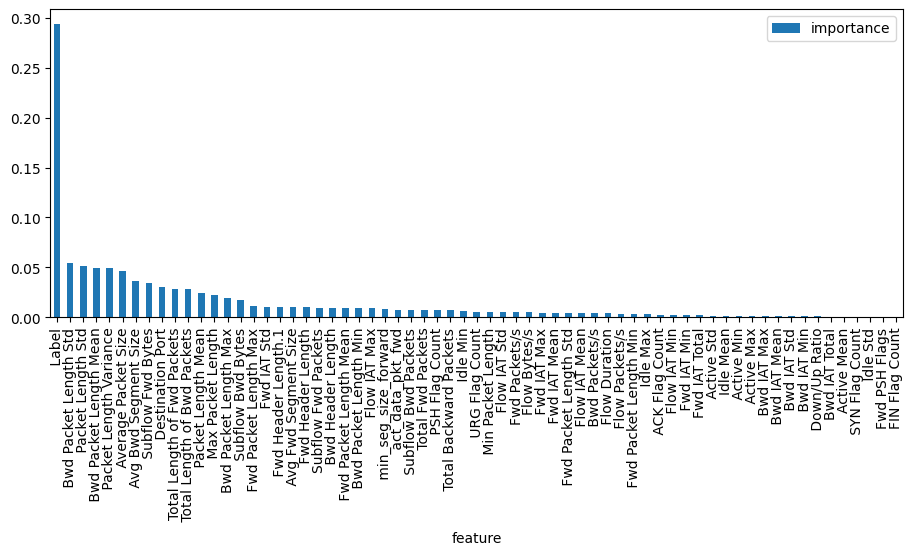

In [18]:
from matplotlib import pyplot as plt

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();
importances

## Feature Extraction - Dimensionality Reduction

### Performing PCA

In [19]:
pca = PCA(n_components=15)
 
pca_features = pca.fit_transform(train_X)
 
print('Shape before PCA: ', train_X.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df_train_X = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])

train_X = pca_df_train_X

Shape before PCA:  (1977585, 65)
Shape after PCA:  (1977585, 15)


In [20]:
pca_features = pca.fit_transform(test_X)
 
print('Shape before PCA: ', test_X.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df_test_X = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])

test_X = pca_df_test_X

Shape before PCA:  (847537, 65)
Shape after PCA:  (847537, 15)


#### Plot the explained variance

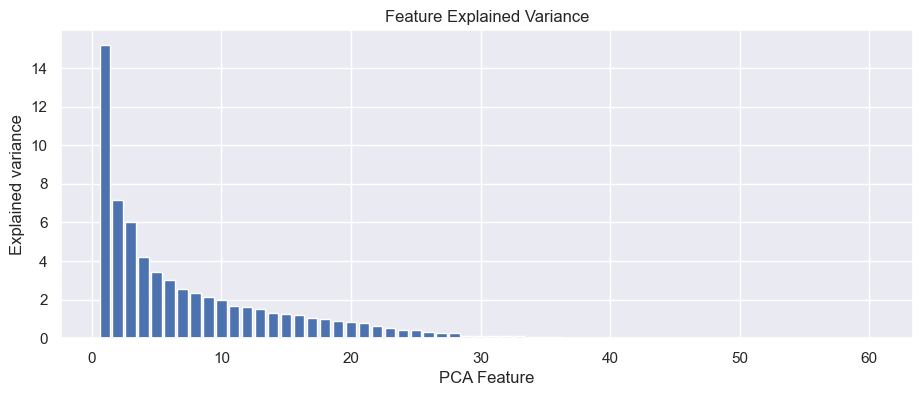

In [21]:
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=60)
 
# Fit and transform data
pca.fit_transform(sc_traindf_X)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

### Performing LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
train_X = lda.fit_transform(train_X, train_y)
test_X = lda.transform(test_X)

In [ ]:
train_X.shape

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(train_X, train_y)
y_pred = classifier.predict(test_X)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(test_y, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(test_y, y_pred)))

# Machine Learning Models

### Knn, Logistic Regression, Gaussian Naive Baye and Decision Tree models

In [22]:
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(train_X, train_y); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(train_X, train_y);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(train_X, train_y)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
#Evaluate Models
from sklearn import metrics

accuracy_score_list = []

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, train_X, train_y, cv=10)
    accuracy = metrics.accuracy_score(train_y, v.predict(train_X))
    confusion_matrix = metrics.confusion_matrix(train_y, v.predict(train_X))
    classification = metrics.classification_report(train_y, v.predict(train_X))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    accuracy_score_list.append(accuracy)
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8487169957810913

Model Accuracy:
 0.8488080158374988

Confusion matrix:
 [[ 264922  124229]
 [ 174766 1413668]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.60      0.68      0.64    389151
         1.0       0.92      0.89      0.90   1588434

    accuracy                           0.85   1977585
   macro avg       0.76      0.79      0.77   1977585
weighted avg       0.86      0.85      0.85   1977585



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9997770007702638

Model Accuracy:
 1.0

Confusion matrix:
 [[ 389151       0]
 [      0 1588434]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    389151
         1.0       1.00      

### Plot the results for each classifier regarding the training phase

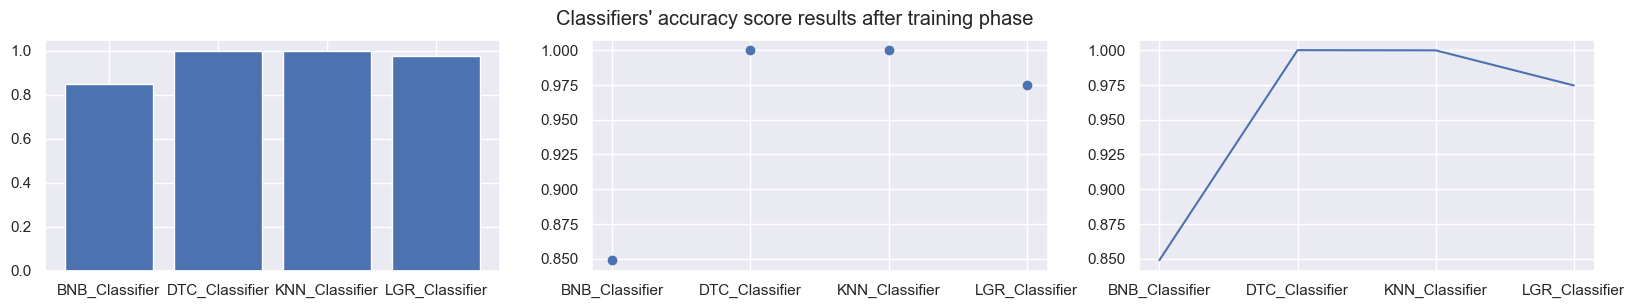

In [24]:
names = ['BNB_Classifier', 'DTC_Classifier', 'KNN_Classifier', 'LGR_Classifier']
values = accuracy_score_list

plt.figure(figsize=(20, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle("Classifiers' accuracy score results after training phase")
plt.show()

## Validation of models

In [25]:
from os import access

accuracy_score_val_list = []

#Validate Models
for i, v in models:
    accuracy = metrics.accuracy_score(test_y, v.predict(test_X))
    confusion_matrix = metrics.confusion_matrix(test_y, v.predict(test_X))
    classification = metrics.classification_report(test_y, v.predict(test_X))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    accuracy_score_val_list.append(accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print() 


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.8366997547009747

Confusion matrix:
 [[ 78780  88446]
 [ 49957 630354]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.61      0.47      0.53    167226
         1.0       0.88      0.93      0.90    680311

    accuracy                           0.84    847537
   macro avg       0.74      0.70      0.72    847537
weighted avg       0.82      0.84      0.83    847537



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.8611116682811488

Confusion matrix:
 [[110214  57012]
 [ 60701 619610]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.64      0.66      0.65    167226
         1.0       0.92      0.91      0.91    680311

    accuracy                           0.86    847537
   macro 

### Plot the results of  each classifier regarding the validation phase

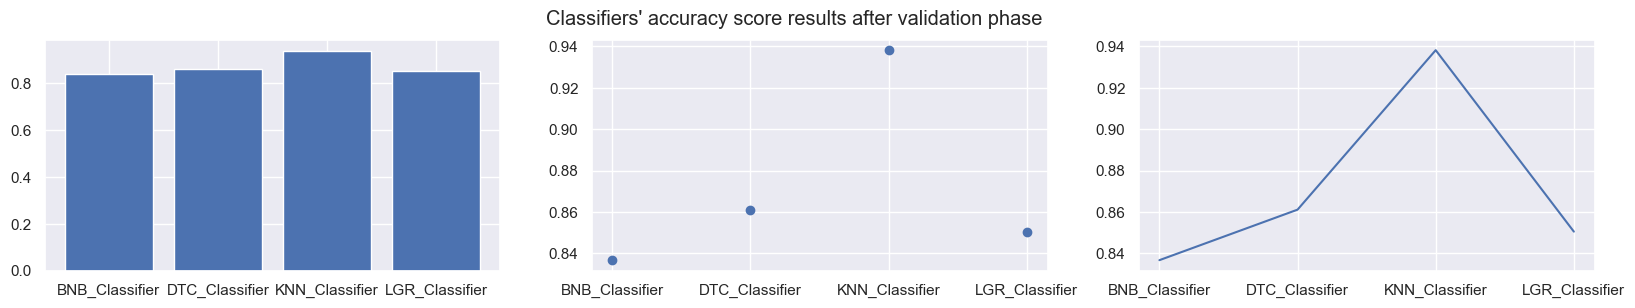

In [26]:
names = ['BNB_Classifier', 'DTC_Classifier', 'KNN_Classifier', 'LGR_Classifier']
values = accuracy_score_val_list

plt.figure(figsize=(20, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle("Classifiers' accuracy score results after validation phase")
plt.show()

# Help

In [ ]:
df_clean.columns

In [ ]:
csvfile=open('features-information-gain-score.csv','w', newline='')

for feature in features_col:
    csvfile.write(feature + ',\n')

csvfile.close()

In [ ]:
count = np.isinf(df_clean).values.sum()

In [ ]:
X_train.isnull().values.any()

In [ ]:
df_clean.isnull().sum()

In [ ]:
print(df_clean[" Label"].unique())

In [ ]:
df_clean

In [ ]:
df_clean.dtypes

In [ ]:
df.dtypes

In [ ]:
trainDep

In [ ]:
file=open('test.txt','w', newline='')

file.write(pd.array(testDep, dtype="string"))

file.close()